<a href="https://colab.research.google.com/github/roniwahyu/google-play-scraping/blob/main/Copy_of_00_google_play_scrapping_151220_(OK).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create Review Dataset for Sentiment Analysis from Google Play
https://play.google.com/




## Setup

In [ ]:
# install python google play scraper library
!pip install -q google_play_scraper

     |████████████████████████████████| 51kB 3.6MB/s 


In [ ]:
# import library
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# 2020 top 10 apps worldwide | monthly active user (jan - oct 2020)
# https://www.appannie.com/en/insights/market-data/2020-mobile-recap-how-to-succeed-in-2021

app_packages = [
  'com.facebook.katana',
  'com.whatsapp',
  'com.facebook.orca',
  'com.instagram.android',
  'com.amazon.windowshop',
  'com.twitter.android',
  'com.netflix.mediaclient',
  'com.ss.android.ugc.trill',
  'com.spotify.music',
  'com.snapchat.android'
]

## Scraping App Information

In [ ]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='us')
  del info['comments']
  app_infos.append(info)

def print_json(json_object):
  json_str = json.dumps(
    json_object,
    indent=2,
    sort_keys=True,
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

100%|██████████| 10/10 [00:02<00:00,  4.60it/s]


In [ ]:
print_json(app_infos[1])

{
  "adSupported": null,
  "androidVersion": "Varies",
  "androidVersionText": "Varies with device",
  "appId": "com.whatsapp",
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "WhatsApp from Facebook\r\n\r\nWhatsApp Messenger is a FREE messaging app available for Android and other smartphones. WhatsApp uses your phone's Internet connection (4G/3G/2G/EDGE or Wi-Fi, as available) to let you message and call friends and family. Switch from SMS to WhatsApp to send and receive messages, calls, photos, videos, documents, and Voice Messages.\r\n\r\nWHY USE WHATSAPP:\r\n\r\n\u2022 NO FEES: WhatsApp uses your phone's Internet connection (4G/3G/2G/EDGE or Wi-Fi, as available) to let you message and call friends and family, so you don't have to pay for every message or call.* There are no subscription fees to use WhatsApp.\r\n\r\n\u2022 MULTIMEDIA: Send and receive photos, videos, documents, and Voice Messages.\r\n\r

In [ ]:
# save JSON app info to CSV file
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.to_csv('/content/gdrive/MyDrive/Perkuliahan/final_project/source/dataset/151220-apps.csv', index=None, header=True)

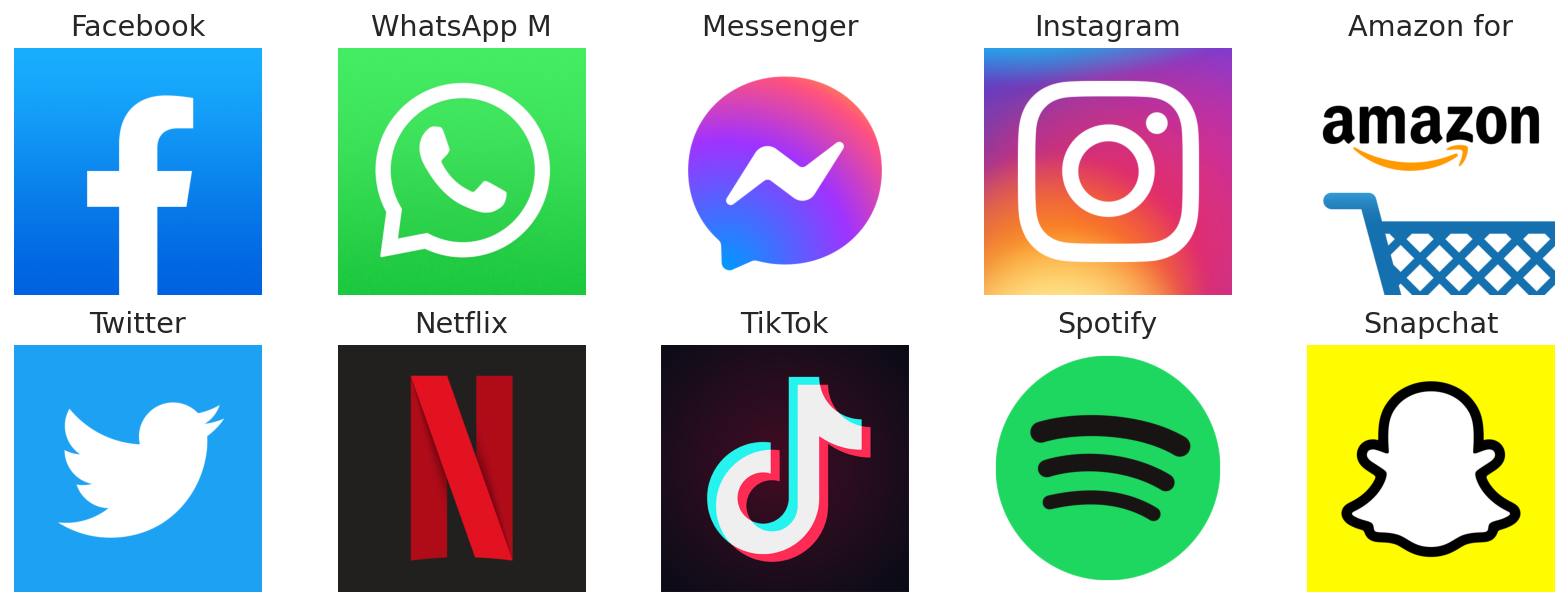

In [ ]:
def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]

fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(14, 5))

for i, ax in enumerate(axs.flat):
  ai = app_infos[i]
  img = plt.imread(ai['icon'])
  ax.imshow(img)
  ax.set_title(format_title(ai['title']))
  ax.axis('off')

## Scraping App Reviews

In [ ]:
app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='id',
        # country='us',
        sort=sort_order,
        count= 200 if score == 3 else 100,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|██████████| 10/10 [00:44<00:00,  4.46s/it]


In [ ]:
print_json(app_reviews[1])

{
  "appId": "com.facebook.katana",
  "at": "2020-12-14 02:22:30",
  "content": "APLIKASI INI JELEK!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!EMANG JELEK NGENTD!!",
  "repliedAt": null,
  "replyContent": null,
  "reviewCreatedVersion": "299.0.0.51.236",
  "reviewId": "gp:AOqpTOEqBoUt0qXj7FGiC86GubVJMu2iNDeZ0fYMi9_zwJqT93th3IycLsP7PNhPDmJZglXbsnjv0JF7x_5nqg",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUpCount": 6,
  "userImage": "https://play-lh.googleusercontent.com/a-/AOh14GiPnJOpEqiIGwsRSOX9lCXtSmV3LgXtIjzCStSVZA",
  "userName": "Alif Vory"
}



In [ ]:
len(app_reviews)

10854

In [ ]:
# save JSON app review to CSV file
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('/content/gdrive/MyDrive/Perkuliahan/final_project/source/dataset/151220-reviews.csv', index=None, header=True)